# 导入工具包

In [1]:
import networkx as nx
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy.linalg

# 创建图

In [3]:
n = 1000
m = 5000
G = nx.gnm_random_graph(n, m, seed=123)

# 邻接矩阵

In [4]:
A = nx.adjacency_matrix(G)

C:\Users\Huanuo\AppData\Local\Temp\ipykernel_16124\1018844737.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [5]:
A.shape

(1000, 1000)

In [6]:
A.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

## 拉普拉斯矩阵

L = D-A  

L拉普拉斯矩阵、D为节点degree对称矩阵、A为邻接矩阵

In [8]:
L = nx.laplacian_matrix(G)

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [9]:
L.shape

(1000, 1000)

In [10]:
D = L+A

In [11]:
D.todense()

matrix([[12,  0,  0, ...,  0,  0,  0],
        [ 0,  8,  0, ...,  0,  0,  0],
        [ 0,  0, 13, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  9,  0,  0],
        [ 0,  0,  0, ...,  0,  9,  0],
        [ 0,  0,  0, ...,  0,  0,  7]], dtype=int32)

## 归一化拉普拉斯矩阵

$L_n = D^{-1/2}LD^{-1/2}$

In [12]:
L_n = nx.normalized_laplacian_matrix(G)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [13]:
L_n.shape

(1000, 1000)

In [14]:
L_n.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

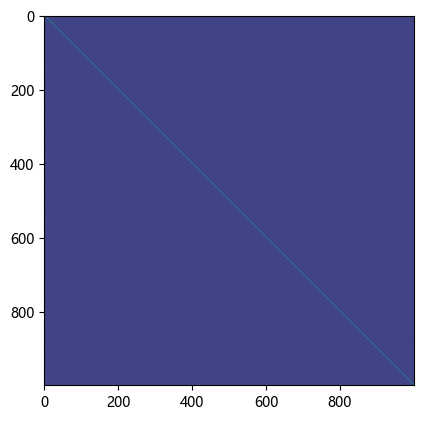

In [15]:
plt.imshow(L_n.todense())
plt.show()

In [16]:
type(L_n)

scipy.sparse._csr.csr_matrix

## 特征值分解

In [17]:
e = np.linalg.eigvals(L_n.A)

In [18]:
e

array([-5.24218921e-17,  4.03979412e-01,  4.12354408e-01,  4.13643079e-01,
        4.17565930e-01,  4.18623558e-01,  4.19045775e-01,  4.27704559e-01,
        4.29629112e-01,  4.30496774e-01,  4.35976102e-01,  4.36270143e-01,
        1.59336695e+00,  1.58973311e+00,  1.58290475e+00,  1.58126361e+00,
        1.57895059e+00,  1.57645127e+00,  1.57259876e+00,  1.57153593e+00,
        1.56934329e+00,  1.56905970e+00,  1.56525818e+00,  1.56370138e+00,
        1.56036585e+00,  1.55853790e+00,  1.55743510e+00,  1.55521262e+00,
        1.55236718e+00,  1.55177556e+00,  1.55125534e+00,  1.54980595e+00,
        1.54758915e+00,  1.54617421e+00,  1.54413910e+00,  1.54176827e+00,
        1.53892393e+00,  1.53803002e+00,  1.53731559e+00,  1.53601779e+00,
        1.53150076e+00,  1.52984602e+00,  1.52939365e+00,  1.52824259e+00,
        1.52791997e+00,  1.52559254e+00,  1.52257678e+00,  1.52069946e+00,
        1.52027450e+00,  1.51934551e+00,  1.51793164e+00,  1.51693888e+00,
        1.51395878e+00,  

In [19]:
max(e)

1.5933669450654486

In [20]:
min(e)

-5.242189214288543e-17

## 特征分布直方图

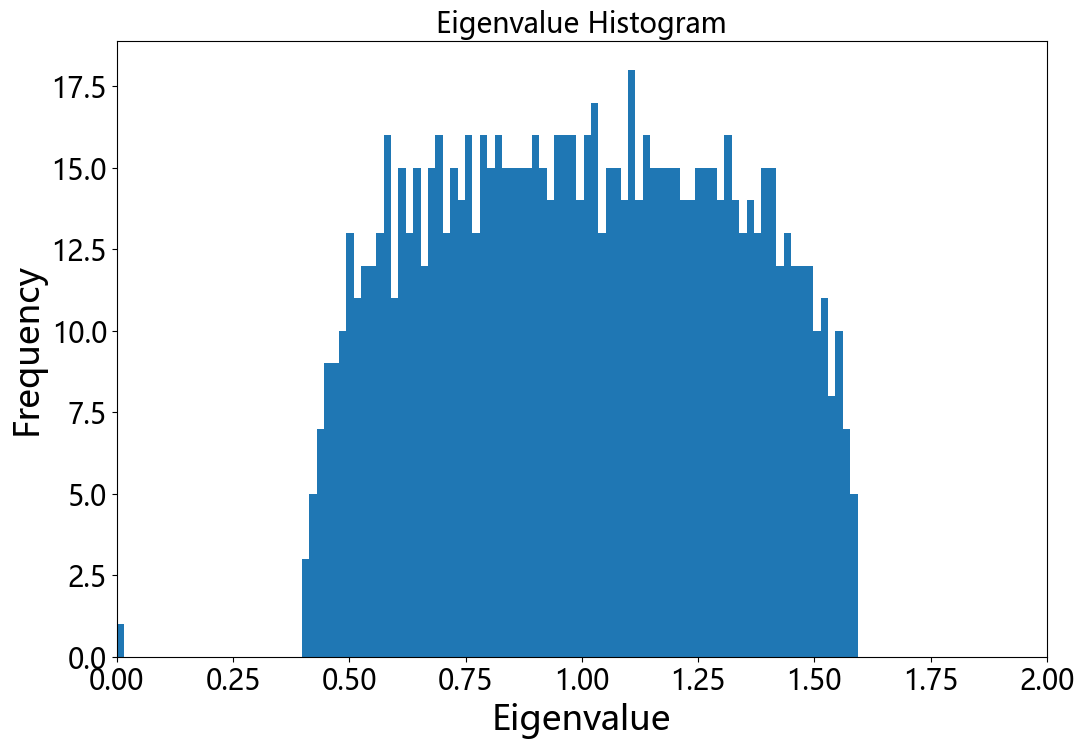

In [23]:
plt.figure(figsize=(12, 8))

plt.hist(e, bins=100)
plt.xlim(0, 2)

plt.title('Eigenvalue Histogram', fontsize=20)
plt.ylabel('Frequency', fontsize=25)
plt.xlabel('Eigenvalue', fontsize=25)
plt.tick_params(labelsize=20)
plt.show()